In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# load data
data = pd.read_csv("C://Users//gashm//OneDrive//Desktop//Machine Learning CS 584//data.csv")

# select features and target variable
X = data.drop(['survived'], axis=1)
y = data['survived']

In [3]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# feature selection using L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear')
selector = SelectFromModel(logreg)
selector.fit(X_train, y_train)

# print selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))


Selected Features: ['id', 'acceptyear', 'age', 'survtime', 'prior', 'transplant', 'wait']


In [4]:
# train logistic regression model with selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
logreg.fit(X_train_selected, y_train)

# make predictions on the testing set
y_pred = logreg.predict(X_test_selected)

# evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7258064516129032


In [5]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.75
Recall: 0.7272727272727273


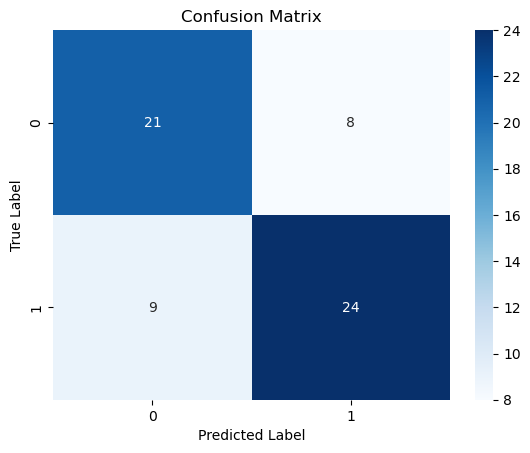

In [6]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()